# Trajectory Visualization

I use similar template to visualize trajectories stored in yaml files.

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.markers as markers
from matplotlib.lines import Line2D
from mpl_toolkits import mplot3d
import numpy as np
import math
import copy
import yaml
import sys
import colorsys as csys

In [11]:
filenames = ['0112_1000', '0112_1031', '0112_1153', '0112_1305' ,'0112_1328']
color_met ={}
cnt = 0
for name in filenames:
    rgb = csys.hsv_to_rgb(float(cnt)/len(filenames), 1, 0.8)
    color_met[name] = rgb
    cnt+=1

patch_1 = Line2D([0], [0], marker='.', color='w', label='Traj P1', markerfacecolor=color_met['0112_1031'], markersize=35)
patch_2 = Line2D([0], [0], marker='.', color='w', label='Traj P2', markerfacecolor=color_met['0112_1153'], markersize=35)
patch_3 = Line2D([0], [0], marker='.', color='w', label='Traj P3', markerfacecolor=color_met['0112_1328'], markersize=35)
patches = [patch_1, patch_2]

def ax_init(ax):
    #ax.set_facecolor((0.0, 0.0, 0.0))
    ax.patch.set_alpha(0)
    ax.axis('equal')
    # ax.set_aspect('auto')
    ax.set_xbound(lower=-10, upper=5)
    ax.set_ybound(lower=-2, upper=65)
    ax.set_xticks(ticks=ax.get_xticks())
    ax.set_xticklabels(-1*ax.get_xticks())
    ax.tick_params(axis='both',labelsize=30)
    ax.legend(handles=patches, fontsize=30)
    ax.set_xlabel('Robot Position Y (meter)', fontsize=30)
    ax.set_ylabel('Robot Position X (meter)', fontsize=30)
    return ax

('New file: ', 'data/0112_1000.yaml')
('New file: ', 'data/0112_1031.yaml')
('New file: ', 'data/0112_1153.yaml')
('New file: ', 'data/0112_1305.yaml')
('New file: ', 'data/0112_1328.yaml')


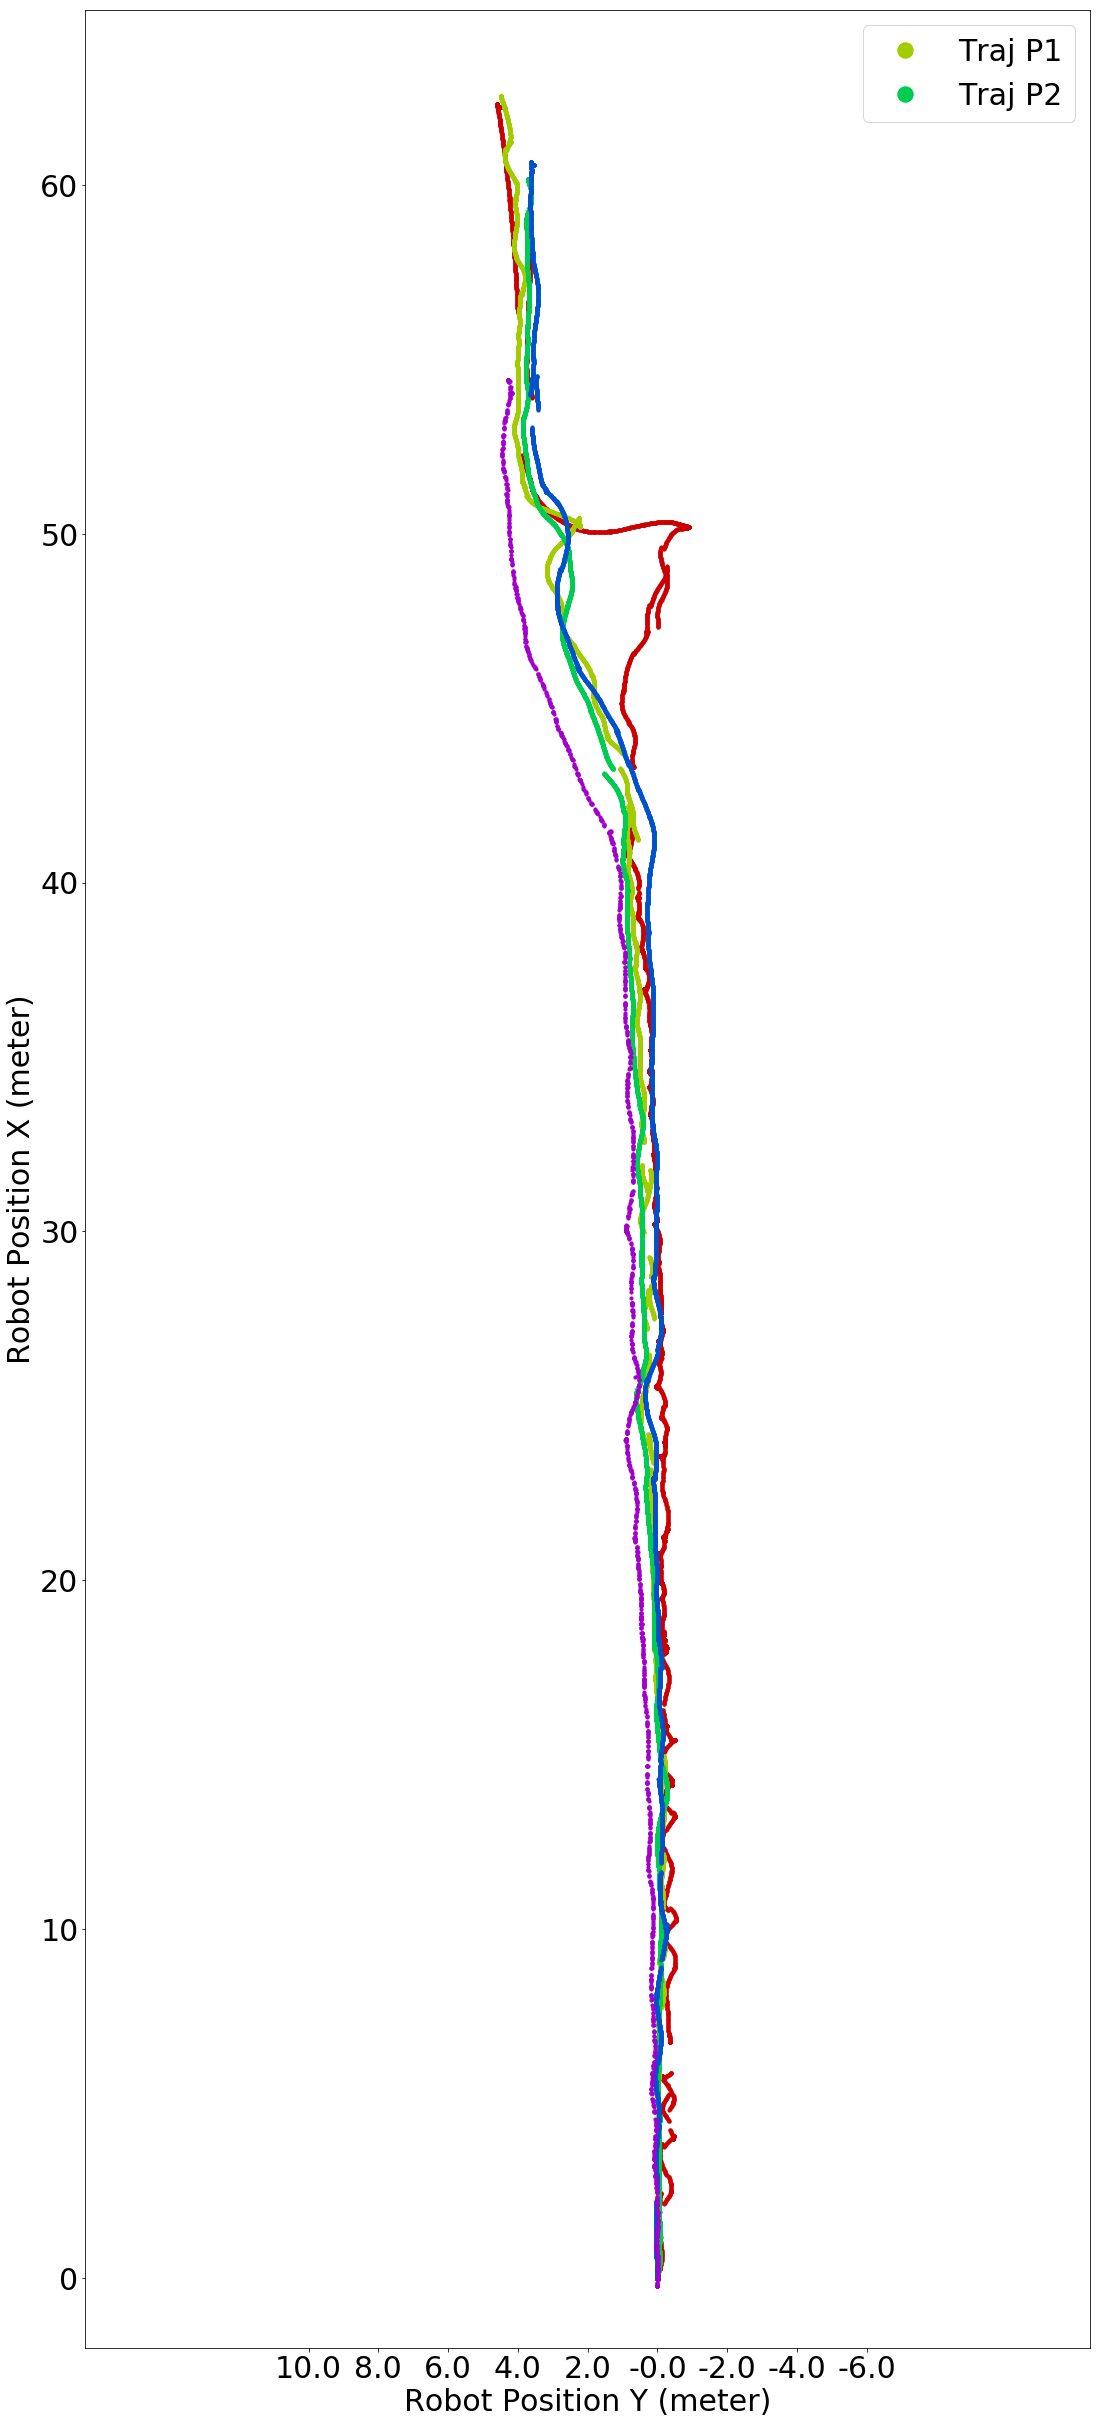

In [12]:
f, axes = plt.subplots(nrows = 1, ncols = 1, figsize=(18,43))
for filename in filenames:

    filename_p = 'data/' + filename + '.yaml'
            
    print('New file: ',filename_p)
            
    try:
        with open(filename_p) as dis_file:
            all_data = yaml.load(dis_file)
            pos_list = all_data['data']
            timestamp = all_data['start_time']

            pos_list['x'] = np.array(pos_list['x'], dtype=np.float64)
            pos_list['y'] = np.array(pos_list['y'], dtype=np.float64)
            pos_list['timestamp'] = np.array(pos_list['timestamp'], dtype=np.float64)
            del all_data
    except IOError:
        print("No such file", filename)
        continue
            
    axes.scatter(-1*pos_list['y'], pos_list['x'], s=10, c=color_met[filename])
    axes = ax_init(axes)
            
    del pos_list
    del timestamp
    
    print "=================================================="

plt.show()